## Library

In [1]:
import math
import random

import numpy as np
import matplotlib.pyplot as plt

import squigglepy as sq
from squigglepy import bayes
from squigglepy.numbers import K, M, B, T

from copy import copy, deepcopy
from scipy import stats
from pprint import pprint
print('Loaded 1')

exec(open('utils.py').read())
print('Loaded 2')

exec(open('modules/tai_timelines.py').read())
print('Loaded TAI timelines module')


Loaded 1
Loaded 2
Loaded TAI timelines module


## Variables

In [2]:
# Global variables - probably don't want to change these but you could.
RUNS = 10000                                      # Number of runs to do (default 10000)
CURRENT_YEAR = 2023                               # What year to start the run on? (default: 2023)
MAX_YEAR = 2123                                   # What year to end the run on? (default: 2123)
years = list(range(CURRENT_YEAR, MAX_YEAR))


# https://docs.google.com/document/d/1oqTuVMa5Lxf6z8ybF7eirtuWEFekJJ6nwudhE7ZjNSY/edit#heading=h.idcca0tmwa6a

variables = {'initial_gdp': 23*T,
             'tai_flop_size': sq.norm(23, 35, credibility=80),
             'algo_doubling_rate_max': 1,
             'algo_doubling_rate_min': 1,
             'min_reduction': 2,
             'max_reduction': 5,
             'initial_flop_per_dollar': 18.3,
             'flop_halving_rate': sq.norm(2.5, 3),       # https://epochai.org/blog/predicting-gpu-performance
             'max_flop_per_dollar': sq.lognorm(21, 24),  # https://epochai.org/blog/predicting-gpu-performance
             'initial_pay': 9,
             'gdp_growth': 1.03,
             'max_gdp_frac': 0.01,
             'spend_doubling_time': sq.lognorm(1, 2)}

print('Loaded')


Loaded


## Run short timelines sketch model

## RUN TIMELINES MODEL ##
Generating Bayes net...


100%|█████████████████████████████████████████████████████████| 10000/10000 [00:02<00:00, 3471.12it/s]


Caching in-memory...
...Cached!
...Reducing
...Reduced!
...All done!
-
## DISTRIBUTION OF TAI ARRIVAL DATE ##
['5%: 2023',
 '10%: 2023',
 '15%: 2023',
 '20%: 2023',
 '25%: 2023',
 '35%: 2023',
 '50%: 2026',
 '60%: 2028',
 '75%: 2033',
 '80%: 2036',
 '90%: 2044',
 '95%: 2060']
-
-
## DISTRIBUTION OF RELATIVE TAI ARRIVAL DATE ##
['5%: 0 years from now',
 '10%: 0 years from now',
 '15%: 0 years from now',
 '20%: 0 years from now',
 '25%: 0 years from now',
 '35%: 0 years from now',
 '50%: 3 years from now',
 '60%: 5 years from now',
 '75%: 10 years from now',
 '80%: 13 years from now',
 '90%: 21 years from now',
 '95%: 37 years from now']
-
-
## TAI ARRIVAL DATE BY BIN ##
This year: 36.3%
2024-2027: 15.1%
2028-2029: 13.8%
2030-2034: 12.9%
2035-2039: 7.4%
2040-2049: 7.0%
2050-2059: 2.3%
2060-2069: 1.2%
2070-2079: 0.4%
2080-2089: 0.3%
2090-2099: 0.3%
2100-2109: 0.2%
2110-2119: 0.3%
>2120: 2.3%
-
## TAI ARRIVAL DATE BY YEAR - COMPARE TO BENCHMARK ##
By EOY 2024: 41.3%
By EOY 2025: 46.7%
By E

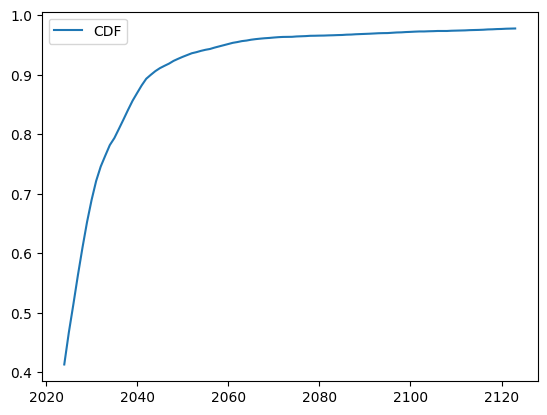

<string>:111: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
<string>:112: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#d

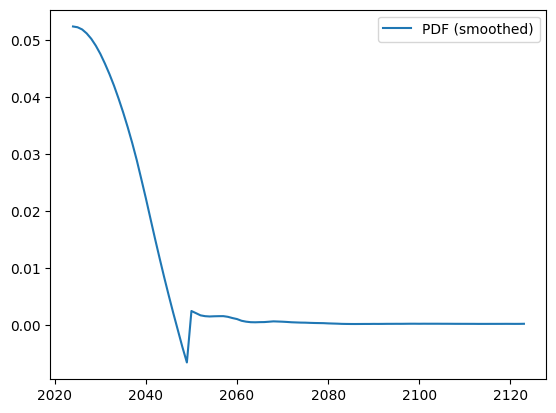

-
-
## TAI FLOP SIZE ##
{1: 17.6,
 5: 20.9,
 10: 22.8,
 20: 25.1,
 30: 26.3,
 40: 27.8,
 50: 28.9,
 60: 30.0,
 70: 31.5,
 80: 33.0,
 90: 35.1,
 95: 36.8,
 99: 39.6}


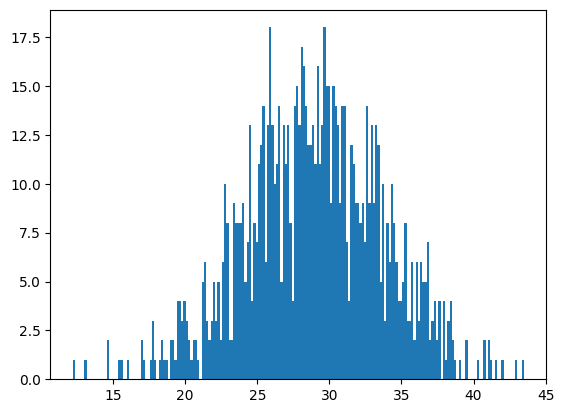

-
-
## MIN REDUCTION: 2 ##
-
## MAX REDUCTION: 5 ##
-
## MIN ALGO DOUBLING RATE: 1 ##
-
## MAX ALGO DOUBLING RATE: 1 ##
-
## INITIAL FLOP PER DOLLAR: 18.3 ##
-
## FLOP HALVING RATE ##
{1: 3.1,
 5: 3.0,
 10: 2.9,
 20: 2.9,
 30: 2.8,
 40: 2.8,
 50: 2.7,
 60: 2.7,
 70: 2.7,
 80: 2.6,
 90: 2.5,
 95: 2.5,
 99: 2.4}


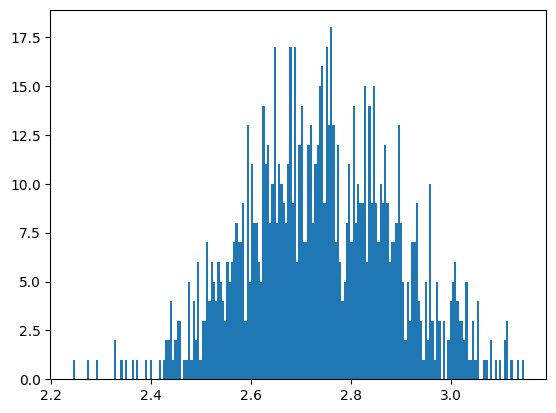

-
-
## MAX FLOP PER DOLLAR ##
{1: 20.4,
 5: 21.0,
 10: 21.3,
 20: 21.7,
 30: 22.0,
 40: 22.3,
 50: 22.5,
 60: 22.7,
 70: 23.0,
 80: 23.3,
 90: 23.7,
 95: 24.0,
 99: 24.5}


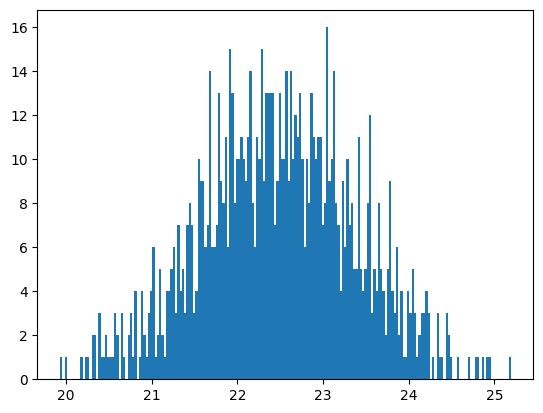

-
-
## INITIAL PAY: 9 ##
-
## GDP GROWTH: 1.03 ##
-
## MAX GDP FRAC: 0.01 ##
-
## SPEND DOUBLING TIME ##
{1: 2.3,
 5: 2.0,
 10: 1.9,
 20: 1.7,
 30: 1.6,
 40: 1.5,
 50: 1.4,
 60: 1.3,
 70: 1.3,
 80: 1.2,
 90: 1.1,
 95: 1.0,
 99: 0.9}


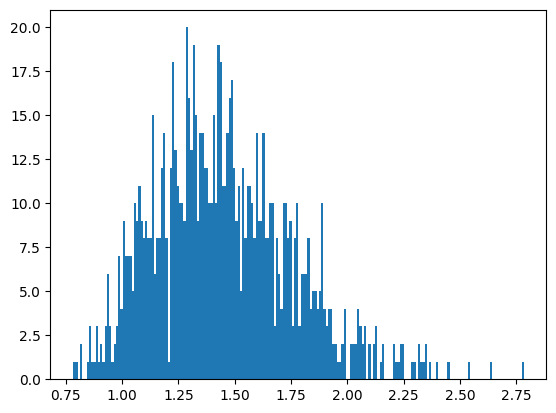

-
-
-
-
## GDP Over Time ##


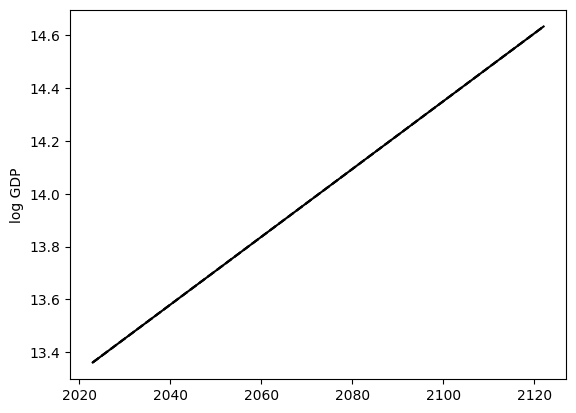

Year: 2023 - GDP log 2022$USD 13.4 (~23 trillion) 90% CI 13.4 (~23 trillion) - 13.4 (~23 trillion)
Year: 2024 - GDP log 2022$USD 13.4 (~24 trillion) 90% CI 13.4 (~24 trillion) - 13.4 (~24 trillion)
Year: 2025 - GDP log 2022$USD 13.4 (~24 trillion) 90% CI 13.4 (~24 trillion) - 13.4 (~24 trillion)
Year: 2026 - GDP log 2022$USD 13.4 (~25 trillion) 90% CI 13.4 (~25 trillion) - 13.4 (~25 trillion)
Year: 2027 - GDP log 2022$USD 13.4 (~26 trillion) 90% CI 13.4 (~26 trillion) - 13.4 (~26 trillion)
Year: 2028 - GDP log 2022$USD 13.4 (~27 trillion) 90% CI 13.4 (~27 trillion) - 13.4 (~27 trillion)
Year: 2029 - GDP log 2022$USD 13.4 (~27 trillion) 90% CI 13.4 (~27 trillion) - 13.4 (~27 trillion)
Year: 2030 - GDP log 2022$USD 13.5 (~28 trillion) 90% CI 13.5 (~28 trillion) - 13.5 (~28 trillion)
Year: 2031 - GDP log 2022$USD 13.5 (~29 trillion) 90% CI 13.5 (~29 trillion) - 13.5 (~29 trillion)
Year: 2032 - GDP log 2022$USD 13.5 (~30 trillion) 90% CI 13.5 (~30 trillion) - 13.5 (~30 trillion)
Year: 2033

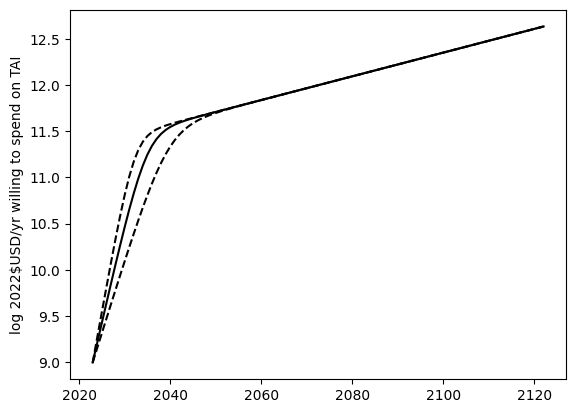

Year: 2023 - willingness log 2022$USD per year 9.0 (~996 million) 90% CI 9.0 (~996 million) - 9.0 (~996 million)
Year: 2024 - willingness log 2022$USD per year 9.2 (~2 billion) 90% CI 9.2 (~1 billion) - 9.3 (~2 billion)
Year: 2025 - willingness log 2022$USD per year 9.4 (~3 billion) 90% CI 9.3 (~2 billion) - 9.5 (~3 billion)
Year: 2026 - willingness log 2022$USD per year 9.6 (~4 billion) 90% CI 9.5 (~3 billion) - 9.8 (~6 billion)
Year: 2027 - willingness log 2022$USD per year 9.8 (~7 billion) 90% CI 9.6 (~4 billion) - 10.1 (~12 billion)
Year: 2028 - willingness log 2022$USD per year 10.1 (~11 billion) 90% CI 9.8 (~6 billion) - 10.3 (~21 billion)
Year: 2029 - willingness log 2022$USD per year 10.3 (~18 billion) 90% CI 9.9 (~9 billion) - 10.6 (~38 billion)
Year: 2030 - willingness log 2022$USD per year 10.5 (~29 billion) 90% CI 10.1 (~12 billion) - 10.8 (~64 billion)
Year: 2031 - willingness log 2022$USD per year 10.6 (~44 billion) 90% CI 10.2 (~17 billion) - 11.0 (~101 billion)
Year: 20

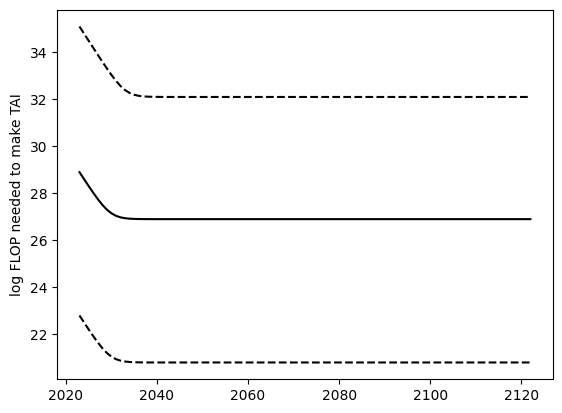

Year: 2023 - log FLOP needed for TAI 28.9 (~79 octillion) 90% CI 22.8 (~63 sextillion) - 35.1 (~126 decillion)
Year: 2024 - log FLOP needed for TAI 28.6 (~41 octillion) 90% CI 22.5 (~32 sextillion) - 34.8 (~63 decillion)
Year: 2025 - log FLOP needed for TAI 28.3 (~21 octillion) 90% CI 22.2 (~16 sextillion) - 34.5 (~32 decillion)
Year: 2026 - log FLOP needed for TAI 28.0 (~11 octillion) 90% CI 21.9 (~9 sextillion) - 34.2 (~16 decillion)
Year: 2027 - log FLOP needed for TAI 27.8 (~6 octillion) 90% CI 21.7 (~5 sextillion) - 33.9 (~8 decillion)
Year: 2028 - log FLOP needed for TAI 27.5 (~3 octillion) 90% CI 21.4 (~3 sextillion) - 33.6 (~4 decillion)
Year: 2029 - log FLOP needed for TAI 27.3 (~2 octillion) 90% CI 21.2 (~2 sextillion) - 33.3 (~2 decillion)
Year: 2030 - log FLOP needed for TAI 27.2 (~1 octillion) 90% CI 21.1 (~1 sextillion) - 33.0 (~1 decillion)
Year: 2031 - log FLOP needed for TAI 27.0 (~1 octillion) 90% CI 20.9 (~877 quintillion) - 32.8 (~618 nonillion)
Year: 2032 - log FLO

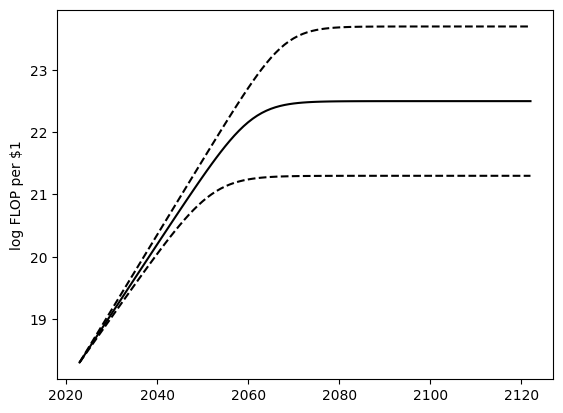

Year: 2023 - log FLOP per 2022$1USD 18.3 (~2 quintillion) 90% CI 18.3 (~2 quintillion) - 18.3 (~2 quintillion)
Year: 2024 - log FLOP per 2022$1USD 18.4 (~3 quintillion) 90% CI 18.4 (~3 quintillion) - 18.4 (~3 quintillion)
Year: 2025 - log FLOP per 2022$1USD 18.5 (~3 quintillion) 90% CI 18.5 (~3 quintillion) - 18.5 (~3 quintillion)
Year: 2026 - log FLOP per 2022$1USD 18.6 (~4 quintillion) 90% CI 18.6 (~4 quintillion) - 18.7 (~5 quintillion)
Year: 2027 - log FLOP per 2022$1USD 18.7 (~6 quintillion) 90% CI 18.7 (~5 quintillion) - 18.8 (~6 quintillion)
Year: 2028 - log FLOP per 2022$1USD 18.9 (~7 quintillion) 90% CI 18.8 (~7 quintillion) - 18.9 (~8 quintillion)
Year: 2029 - log FLOP per 2022$1USD 19.0 (~9 quintillion) 90% CI 18.9 (~8 quintillion) - 19.0 (~11 quintillion)
Year: 2030 - log FLOP per 2022$1USD 19.1 (~12 quintillion) 90% CI 19.0 (~11 quintillion) - 19.1 (~14 quintillion)
Year: 2031 - log FLOP per 2022$1USD 19.2 (~16 quintillion) 90% CI 19.1 (~13 quintillion) - 19.3 (~18 quintil

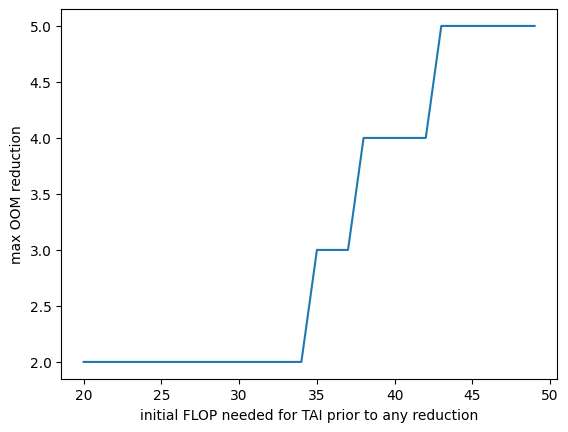

TAI log FLOP 20 -> 2.0 OOM reductions possible
TAI log FLOP 21 -> 2.0 OOM reductions possible
TAI log FLOP 22 -> 2.0 OOM reductions possible
TAI log FLOP 23 -> 2.0 OOM reductions possible
TAI log FLOP 24 -> 2.0 OOM reductions possible
TAI log FLOP 25 -> 2.0 OOM reductions possible
TAI log FLOP 26 -> 2.0 OOM reductions possible
TAI log FLOP 27 -> 2.0 OOM reductions possible
TAI log FLOP 28 -> 2.0 OOM reductions possible
TAI log FLOP 29 -> 2.0 OOM reductions possible
TAI log FLOP 30 -> 2.0 OOM reductions possible
TAI log FLOP 31 -> 2.0 OOM reductions possible
TAI log FLOP 32 -> 2.0 OOM reductions possible
TAI log FLOP 33 -> 2.0 OOM reductions possible
TAI log FLOP 34 -> 2.0 OOM reductions possible
TAI log FLOP 35 -> 3.0 OOM reductions possible
TAI log FLOP 36 -> 3.0 OOM reductions possible
TAI log FLOP 37 -> 3.0 OOM reductions possible
TAI log FLOP 38 -> 4.0 OOM reductions possible
TAI log FLOP 39 -> 4.0 OOM reductions possible
TAI log FLOP 40 -> 4.0 OOM reductions possible
TAI log FLOP 

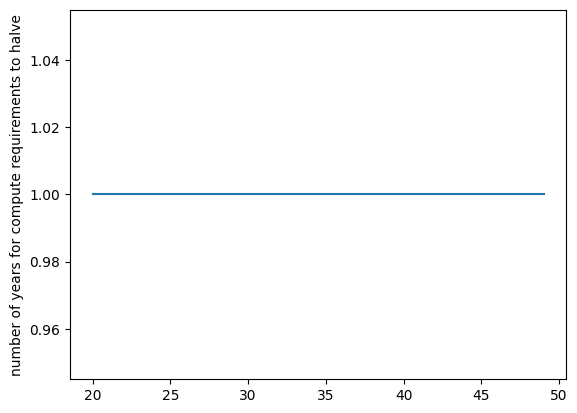

TAI log FLOP 20 -> algo doubling rate 1.0yrs
TAI log FLOP 21 -> algo doubling rate 1.0yrs
TAI log FLOP 22 -> algo doubling rate 1.0yrs
TAI log FLOP 23 -> algo doubling rate 1.0yrs
TAI log FLOP 24 -> algo doubling rate 1.0yrs
TAI log FLOP 25 -> algo doubling rate 1.0yrs
TAI log FLOP 26 -> algo doubling rate 1.0yrs
TAI log FLOP 27 -> algo doubling rate 1.0yrs
TAI log FLOP 28 -> algo doubling rate 1.0yrs
TAI log FLOP 29 -> algo doubling rate 1.0yrs
TAI log FLOP 30 -> algo doubling rate 1.0yrs
TAI log FLOP 31 -> algo doubling rate 1.0yrs
TAI log FLOP 32 -> algo doubling rate 1.0yrs
TAI log FLOP 33 -> algo doubling rate 1.0yrs
TAI log FLOP 34 -> algo doubling rate 1.0yrs
TAI log FLOP 35 -> algo doubling rate 1.0yrs
TAI log FLOP 36 -> algo doubling rate 1.0yrs
TAI log FLOP 37 -> algo doubling rate 1.0yrs
TAI log FLOP 38 -> algo doubling rate 1.0yrs
TAI log FLOP 39 -> algo doubling rate 1.0yrs
TAI log FLOP 40 -> algo doubling rate 1.0yrs
TAI log FLOP 41 -> algo doubling rate 1.0yrs
TAI log FL

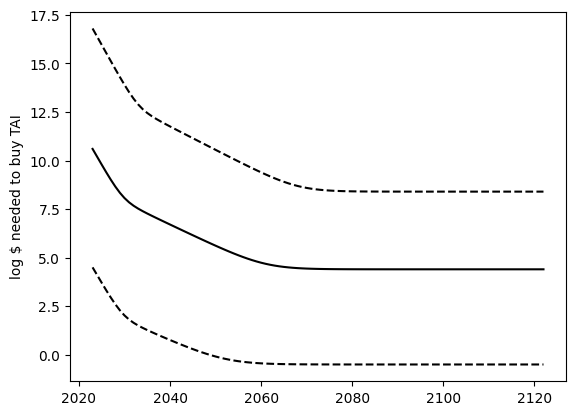

Year: 2023 - 10.6 log 2022$USD to buy TAI (~40 billion) 90% CI 4.5 (~32 thousand) - 16.8 (~63 quadrillion)
Year: 2024 - 10.2 log 2022$USD to buy TAI (~16 billion) 90% CI 4.1 (~13 thousand) - 16.4 (~24 quadrillion)
Year: 2025 - 9.8 log 2022$USD to buy TAI (~6 billion) 90% CI 3.7 (~5 thousand) - 16.0 (~9 quadrillion)
Year: 2026 - 9.4 log 2022$USD to buy TAI (~2 billion) 90% CI 3.3 (~2 thousand) - 15.5 (~3 quadrillion)
Year: 2027 - 9.0 log 2022$USD to buy TAI (~1 billion) 90% CI 2.9 (~883.593563107372) - 15.1 (~1 quadrillion)
Year: 2028 - 8.7 log 2022$USD to buy TAI (~455 million) 90% CI 2.6 (~396.1313259036645) - 14.7 (~509 trillion)
Year: 2029 - 8.3 log 2022$USD to buy TAI (~219 million) 90% CI 2.3 (~193.9374221822864) - 14.3 (~199 trillion)
Year: 2030 - 8.1 log 2022$USD to buy TAI (~118 million) 90% CI 2.0 (~106.26955107459091) - 13.9 (~80 trillion)
Year: 2031 - 7.9 log 2022$USD to buy TAI (~71 million) 90% CI 1.8 (~65.42016590932165) - 13.5 (~34 trillion)
Year: 2032 - 7.7 log 2022$USD

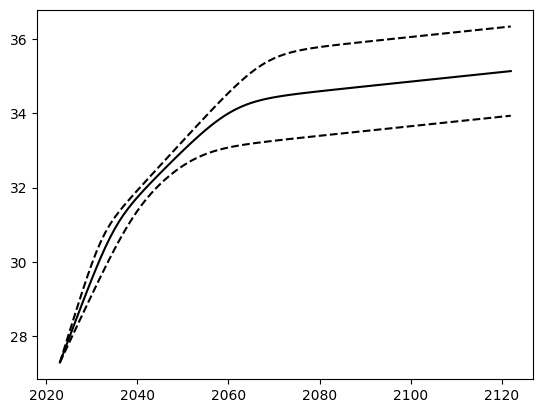

Year: 2023 - max log FLOP 27.3 (~2 octillion) 90% CI 27.3 (~2 octillion) - 27.3 (~2 octillion)
Year: 2024 - max log FLOP 27.6 (~4 octillion) 90% CI 27.6 (~4 octillion) - 27.7 (~5 octillion)
Year: 2025 - max log FLOP 27.9 (~9 octillion) 90% CI 27.8 (~7 octillion) - 28.1 (~12 octillion)
Year: 2026 - max log FLOP 28.3 (~19 octillion) 90% CI 28.1 (~12 octillion) - 28.5 (~30 octillion)
Year: 2027 - max log FLOP 28.6 (~39 octillion) 90% CI 28.3 (~22 octillion) - 28.9 (~72 octillion)
Year: 2028 - max log FLOP 28.9 (~82 octillion) 90% CI 28.6 (~40 octillion) - 29.2 (~171 octillion)
Year: 2029 - max log FLOP 29.2 (~169 octillion) 90% CI 28.9 (~72 octillion) - 29.6 (~398 octillion)
Year: 2030 - max log FLOP 29.5 (~346 octillion) 90% CI 29.1 (~130 octillion) - 29.9 (~886 octillion)
Year: 2031 - max log FLOP 29.8 (~692 octillion) 90% CI 29.4 (~233 octillion) - 30.3 (~2 nonillion)
Year: 2032 - max log FLOP 30.1 (~1 nonillion) 90% CI 29.6 (~416 octillion) - 30.6 (~4 nonillion)
Year: 2033 - max log F

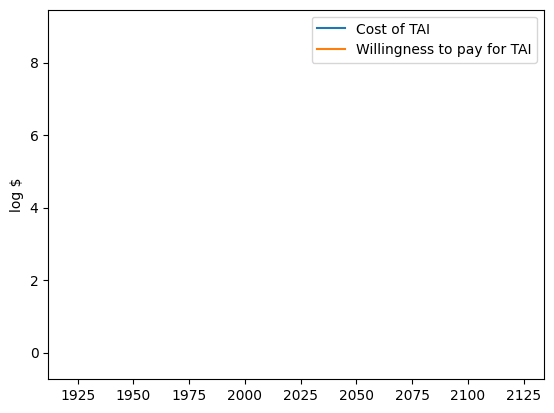

-
-
## SAMPLE RUN 2 ##
It takes 28.4 log FLOP (~26 octillion) for transformative capabilities.
Every 1.0 years algorithms get 2x better, with 2 log reductions possible.
FLOP start at a cost of 18.3 log FLOP (~2 quintillion) per 2022$USD. Every 2.5 years they get 2x cheaper, to a maximum of 23.7 log FLOP (~516 sextillion) per 2022$USD.
We are willing to pay 9.0 log 2022$USD (~1 billion) and this doubles every 0.9 years to a max of 0.01% of GDP. GDP grows at a rate of 1.03x per year.
If a non-scaling delay happens, it will take an additional 0 years to produce TAI due to issues unrelated to scaling FLOP
---
Year: 2023 - 27.3 max log FLOP (2 octillion) available - TAI takes 28.4 log FLOP (26 octillion) - log $ 10.1 to buy TAI (13 billion) vs. willingness to pay log $ 9.0 (996 million) - 18.3 log FLOP per $ (2 quintillion)
Year: 2024 - 27.7 max log FLOP (5 octillion) available - TAI takes 28.1 log FLOP (13 octillion) - log $ 9.7 to buy TAI (5 billion) vs. willingness to pay log $ 9.3 (2 bi

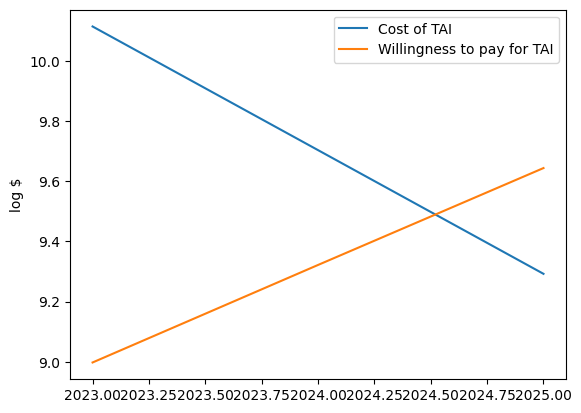

-
-
## SAMPLE RUN 3 ##
It takes 32.2 log FLOP (~169 nonillion) for transformative capabilities.
Every 1 years algorithms get 2x better, with 2 log reductions possible.
FLOP start at a cost of 18.3 log FLOP (~2 quintillion) per 2022$USD. Every 2.5 years they get 2x cheaper, to a maximum of 22.1 log FLOP (~12 sextillion) per 2022$USD.
We are willing to pay 9.0 log 2022$USD (~1 billion) and this doubles every 1.8 years to a max of 0.01% of GDP. GDP grows at a rate of 1.03x per year.
If a non-scaling delay happens, it will take an additional 0 years to produce TAI due to issues unrelated to scaling FLOP
---
Year: 2023 - 27.3 max log FLOP (2 octillion) available - TAI takes 32.2 log FLOP (169 nonillion) - log $ 13.9 to buy TAI (85 trillion) vs. willingness to pay log $ 9.0 (996 million) - 18.3 log FLOP per $ (2 quintillion)
Year: 2024 - 27.6 max log FLOP (4 octillion) available - TAI takes 31.9 log FLOP (86 nonillion) - log $ 13.5 to buy TAI (33 trillion) vs. willingness to pay log $ 9.2 (1

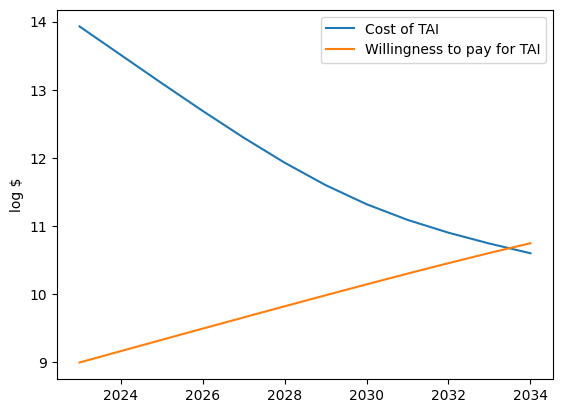

In [3]:
run_timelines_model(variables, runs=RUNS)